# HYPOTHESIS TESTING

- Hypothesis test for the difference between means of two populations.

- Hypothesis Testing is a type of statistical analysis in which you put your assumptions about a population parameter to the test. It is used to estimate the relationship between 2 statistical variables.

- For example, a company is claiming that their average sales for this quarter are 1000 units. This is an example of a simple hypothesis. Suppose the company claims that the sales are in the range of 900 to 1000 units. Then this is a case of a composite hypothesis.




- **Level of Significance** : The alpha value is a criterion for determining whether a test statistic is statistically significant. In a statistical test, Alpha represents an acceptable probability of a Type I error. Because alpha is a probability, it can be anywhere between 0 and 1. In practice, the most commonly used alpha values are 0.01, 0.05, and 0.1, which represent a 1%, 5%, and 10% chance of a Type I error, respectively (i.e. rejecting the null hypothesis when it is in fact correct).  **(For results with a 90 percent level of confidence, the value of alpha is 1 — 0.90 = 0.1)**

- **P-Value** : A p-value is a metric that expresses the likelihood that an observed difference could have occurred by chance. As the p-value decreases the statistical significance of the observed difference increases. If the p-value is too low, you reject the null hypothesis.

# CHI-SQUARE TEST


**The chi-square statistic is a single number that tells you how much difference there is between the counts you observe.**

**A low value for chi-square means there is a high correlation between your two data sets.**




# PROJECT INFORMATION

You have tested 2 versions A and B of the "SHOP NOW" button on Eniac's website.

After the experiment is complete, these are the results:

- Version A: 134 clicks, 8391 visits.
- Version B: 102 clicks, 4512 visits.


Now we want to know whether one of the versions is much better, and to an extent that this is unlikely to be explained by chance alone.

# STATISTICAL ASSUMPTIONS FOR CHI-SQUARE TEST

For the results of a Chi-square-test to be valid, the following 4 assumptions should be met:


- Both variables are categorical.

- All observations are independent.

- Cells in the contingency table are mutually exclusive.

- The sample size is large enough (at least 5 observations in each of the cells of the table with expected values).

# CONTROL THE ASSUMPTIONS 

## 1) Both variables are categorical.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Observed results
Click = [134, 102]
No_click = [8257, 4410]

# Display the data in the form of a contingency table
observed = pd.DataFrame([Click, No_click],
                           columns = ["A", "B"],
                           index = ["Click", "No_click"])
observed

,A,B
Click,134,102
No_click,8257,4410


All versions (A, B) and the results (click, no-click) are categories.

Condition fulfilled.

## 2) All observations are independent.

This needs to be ensured while collecting the data. At this point, we will assume that the visitors to the website were allocated randomly and did not influence each other, and that thus, their clicks are independent.

Condition fulfilled.

##3) Cells in the contingency table are mutually exclusive.

"A contingency table, sometimes called a two-way frequency table, is a tabular mechanism with at least two rows and two columns used in statistics to present categorical data in terms of frequency counts."

Technically, this needs to be ensured while collecting the data. Logically, any visitor's behaviour can only be described using one single column (A, B) and one single row (click or no-click), meaning that the cells are mutually exclusive.

Condition fulfilled.

## 4) The sample size is large enough (at least 5 observations in each of the cells of the table with expected values).


We will need to know the expected values for each of the cells . "Expected" means a perfectly equal distribution of clicks and no-clicks across the three versions, as stated by the Null Hypothesis. In order to calculate these values, we need to know the total numbers of clicks and no-clicks each.

In [3]:
# Expand the observed dataframe by adding a row and a column containing the totals of each column and row, respectively.
observed_expanded = observed.copy()
observed_expanded

,A,B
Click,134,102
No_click,8257,4410


In [4]:
# Create a new row called "Total" with the totals of each column.
observed_expanded.loc["Total"] = observed_expanded.sum()
# Create a new column called "Total" with the totals of each row.
observed_expanded["Total"] = observed_expanded["A"] + observed_expanded["B"]
observed_expanded

,A,B,Total
Click,134,102,236
No_click,8257,4410,12667
Total,8391,4512,12903


Each of the versions got the exact same amount of visitors. Therefore, we would expect the number of clicks to be the same for each version, assuming that H0 is true which means that all versions have the same click rate.

The expected number of clicks for each version is thus exactly 1/2 of the total number of clicks. Likewise, the expected number of no-clicks is exactly 1/2 of the total number of no-clicks.

In [5]:
# Create table for the expected values as a copy of the observed table.
# We will overwrite the values in the cells with the code below.
expected = observed.copy()
expected

,A,B
Click,134,102
No_click,8257,4410


In [6]:
# Iterating over the rows in the table.
for i in range(expected.shape[0]):
  # Iterating over the columns in the table.
  for j in range(expected.shape[1]):
    # Setting the value in each cell to be equal to:
    # the Total value of that same row in the observed_expanded table, divided by the number of versions.
    expected.iloc[i,j] = observed_expanded.iloc[i,2] / observed.shape[1]

expected

,A,B
Click,118.0,118.0
No_click,6333.5,6333.5


There are more than 5 observations expected in each of the cells.

Condition fulfilled.

> Note: In our table of expected values, all values in the click row are the same, just like all values in the no-click row are the same. This is due to the fact that all three versions got the same number of total visits. Whenever this is not the case, you might prefer using the following approach.

In [7]:
# For reasons of clarity, we get the largest index of the observed_expanded dataframe and assign it to a variable.
max_row_index = len(observed_expanded.index)-1
max_row_index

2

In [8]:
# For reasons of clarity, we get the largest index of the observed_expanded dataframe columns and assign it to a variable.
max_column_index = len(observed_expanded.columns)-1
max_column_index

2

In [9]:
# Create table for the expected values as a copy of the observed table.
# We will overwrite the values in the cells with the code below.
expected_2 = observed.copy()

# Iterating over the rows in the table.
for i in range(expected_2.shape[0]):
  # Iterating over the columns in the table.
  for j in range(expected_2.shape[1]):
    # Setting the value in each cell to be equal to:
    # the Total value of that same columns in the observed_expanded table
    # (i.e. the total visitors of that version),
    # multiplied by the share of that row's total from the overall total
    # (i.e. the share of clicks/no-clicks from the overall total number of visitors) 
    expected_2.iloc[i,j] = observed_expanded.iloc[max_row_index,j] * (observed_expanded.iloc[i,max_column_index]/observed_expanded.iloc[max_row_index,max_column_index])

expected_2

,A,B
Click,153.474076,82.525924
No_click,8237.525924,4429.474076


# DECIDE ON THE APPROPRIATE TEST TO USE

Comparing the observed frequencies to the expected frequencies in one or more categories of a contingency table is done using a **Chi-squared test**.

The associated test statistic is the chi-squared test statistic: 
$\chi^2_c = \sum_{\substack{0\le i\le n\\0\le j\le r}}\frac{(O_{ij}-E_{ij})^2} {E_{ij}}$

where

c = degrees of freedom

n = total number of columns

r = total number of rows

$O_{ij}$ = observed value in the ith column and jth row

$E_{ij}$ = expected value in the ith column and jth row

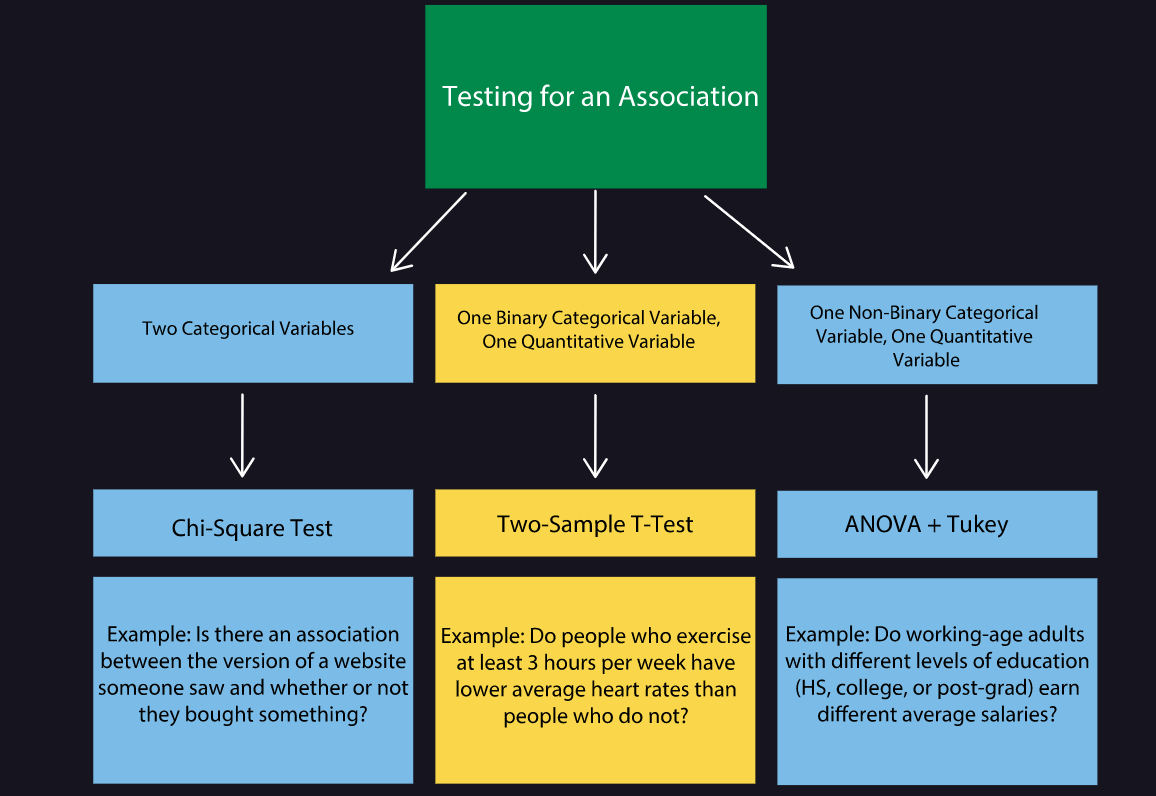

# SELECTING AN APPROPRIATE SIGNIFICANCE LEVEL ALPHA (𝛼)


We need to state the significance level before we look at any data to prevent data snooping.

Alpha denotes the probability of rejecting the Null Hypothesis given that it's true. This can happen when our sample has relatively extreme values, which doesn't often happen - particularly in a well designed experiment. In such extreme cases, we would conclude that the Null Hypothesis would be unlikely (not impossible) and reject it.

Commonly used levels are 0.1, 0.05 and 0.01.

Since we think that the version of a button will probably not change the course of history, a comfortable alpha of 0.1 will be well-suited.

# SOLUTION: CODERS APPROACH

You have tested 2 versions A and B of the "SHOP NOW" button on Eniac's website.

After the experiment is complete, these are the results:

- Version A: 134 clicks, 8391 visits.
- Version B: 102 clicks, 4512 visits.


Now we want to know whether one of the versions is much better, and to an extent that this is unlikely to be explained by chance alone.

The faster way is to use scipy's function to perform chi-squared tests.

To determine whether or not to reject the Null Hypothesis, it is common to compare the alpha to the so-called p-value (instead of comparing the test statistic to the critical region).

Note: Whether you compare alpha to the p-value or the test statistic to the critical values/regions is a matter of personal taste. The result itself will always be the same.


>> Set Up the null and alternate hypothesis:

- **Null Hypothesis ( 𝐻0 ) : click rate(version A) = click rate(version B)**


- **Alternative Hypothesis ( 𝐻𝐴 ) : at least one of the versions has a significantly better or worse click rate than the others**


In [10]:
from scipy.stats import chi2_contingency

In [11]:
alpha = 0.1

In [12]:
observed

,A,B
Click,134,102
No_click,8257,4410


In [13]:
chisq, pvalue, df, expected = chi2_contingency(observed)
chisq

6.833210011510735

In [14]:
pvalue

0.008947831519300333

In [15]:
df

1

In [16]:
expected

array([[ 153.4740758,   82.5259242],
       [8237.5259242, 4429.4740758]])

Check whether the chi-squared test statistic calculated manually and the one calculated using scipy are the same.

In [17]:
if pvalue > alpha:
  print("The p-value is larger than alpha.")
else:
  print("The p-value is smaller than alpha.")

The p-value is smaller than alpha.


## RESULT

**Since the p-value is smaller than alpha, we accept the Alternative Hypothesis.**

- **Alternative Hypothesis ( 𝐻𝐴 ) : at least one of the versions has a significantly better or worse click rate than the others**

- We can assume that the Null Hypothesis is true: **There is a statistically significant difference between the means of the control group and the test group.**